In [146]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Graficos

In [147]:
df = pd.read_csv("../datos/df_modificado.csv", index_col = 0)


df.head(5)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,remotework
0,52,No,non-travel,2015.7,desconocido,6,3,desconocido,1,1,1,M,252.0,3,5,research director,3,desconocido,16280.83,42330.17,7,No,13,3.0,3,full time,0,NaN,5,3.0,20,15,15,16280.83,1972,195370.0,desconocido,True
1,53,No,non-travel,2063.4,desconocido,1,4,life sciences,1,2,3,M,257.9,2,5,manager,3,desconocido,NaN,43331.17,0,Desconocido,14,3.0,1,full time,1,34.0,5,3.0,33,11,9,NaN,1971,199990.0,desconocido,False
2,43,No,travel_rarely,1984.3,research & development,4,2,technical degree,1,3,3,M,248.0,3,5,manager,4,married,NaN,41669.33,1,No,11,3.0,4,full time,0,22.0,3,NaN,22,11,15,NaN,1981,192320.0,manager - research & development,False
3,48,No,travel_rarely,1771.4,desconocido,2,4,medical,1,4,1,F,221.4,3,4,research director,3,married,14307.50,37199.50,3,Desconocido,19,3.0,2,full time,2,NaN,2,NaN,20,5,6,14307.50,1976,171690.0,desconocido,False
4,47,No,non-travel,1582.8,desconocido,3,3,technical degree,1,5,1,F,197.8,4,4,sales executive,1,divorced,12783.92,33238.20,2,No,12,3.0,4,full time,1,NaN,5,3.0,19,2,8,12783.92,1977,NaN,desconocido,True


In [190]:
df['SatisfactionLevel'] = np.where(df['jobsatisfaction'] <= 2, 'No satisfecho', 'Satisfecho')

In [192]:
df.head(2)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,remotework,SatisfactionLevel
0,52,No,non-travel,2015.7,desconocido,6,3,desconocido,1,1,1,M,252.0,3,5,research director,3,desconocido,16280.83,42330.17,7,No,13,3.0,3,full time,0,NaN,5,3.0,20,15,15,16280.83,1972,195370.0,desconocido,True,Satisfecho
1,53,No,non-travel,2063.4,desconocido,1,4,life sciences,1,2,3,M,257.9,2,5,manager,3,desconocido,4492.84,43331.17,0,Desconocido,14,3.0,1,full time,1,34.0,5,3.0,33,11,9,NaN,1971,199990.0,desconocido,False,Satisfecho


In [148]:
df["worklifebalance"].dtype

dtype('float64')

In [149]:
porc_nulos = (df.isnull().sum() / df.shape[0]) * 100
porc_nulos

age                          0.000000
attrition                    0.000000
businesstravel               0.000000
dailyrate                    0.000000
department                   0.000000
distancefromhome             0.000000
education                    0.000000
educationfield               0.000000
employeecount                0.000000
employeenumber               0.000000
environmentsatisfaction      0.000000
gender                       0.000000
hourlyrate                   0.000000
jobinvolvement               0.000000
joblevel                     0.000000
jobrole                      0.000000
jobsatisfaction              0.000000
maritalstatus                0.000000
monthlyincome               29.141836
monthlyrate                  0.000000
numcompaniesworked           0.000000
overtime                     0.000000
percentsalaryhike            0.000000
performancerating           11.918951
relationshipsatisfaction     0.000000
standardhours                0.000000
stockoptionl

In [150]:
# lo convertimos a DataFrame
df_nulos = pd.DataFrame(porc_nulos, columns = ["%_nulos"])
# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
monthlyincome,29.141836
performancerating,11.918951
totalworkingyears,32.717521
worklifebalance,6.793802
sameasmonthlyincome,29.141836
salary,16.984505


In [151]:
columnas = df.describe().columns
columnas

Index(['age', 'dailyrate', 'distancefromhome', 'education', 'employeecount',
       'employeenumber', 'environmentsatisfaction', 'hourlyrate',
       'jobinvolvement', 'joblevel', 'jobsatisfaction', 'monthlyincome',
       'monthlyrate', 'numcompaniesworked', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearssincelastpromotion', 'yearswithcurrmanager',
       'sameasmonthlyincome', 'datebirth', 'salary'],
      dtype='object')

In [152]:
columnas2 = ["salary", "percentsalaryhike", "worklifebalance", "distancefromhome", "dailyrate", "totalworkingyears", "yearssincelastpromotion", "monthlyincome"]

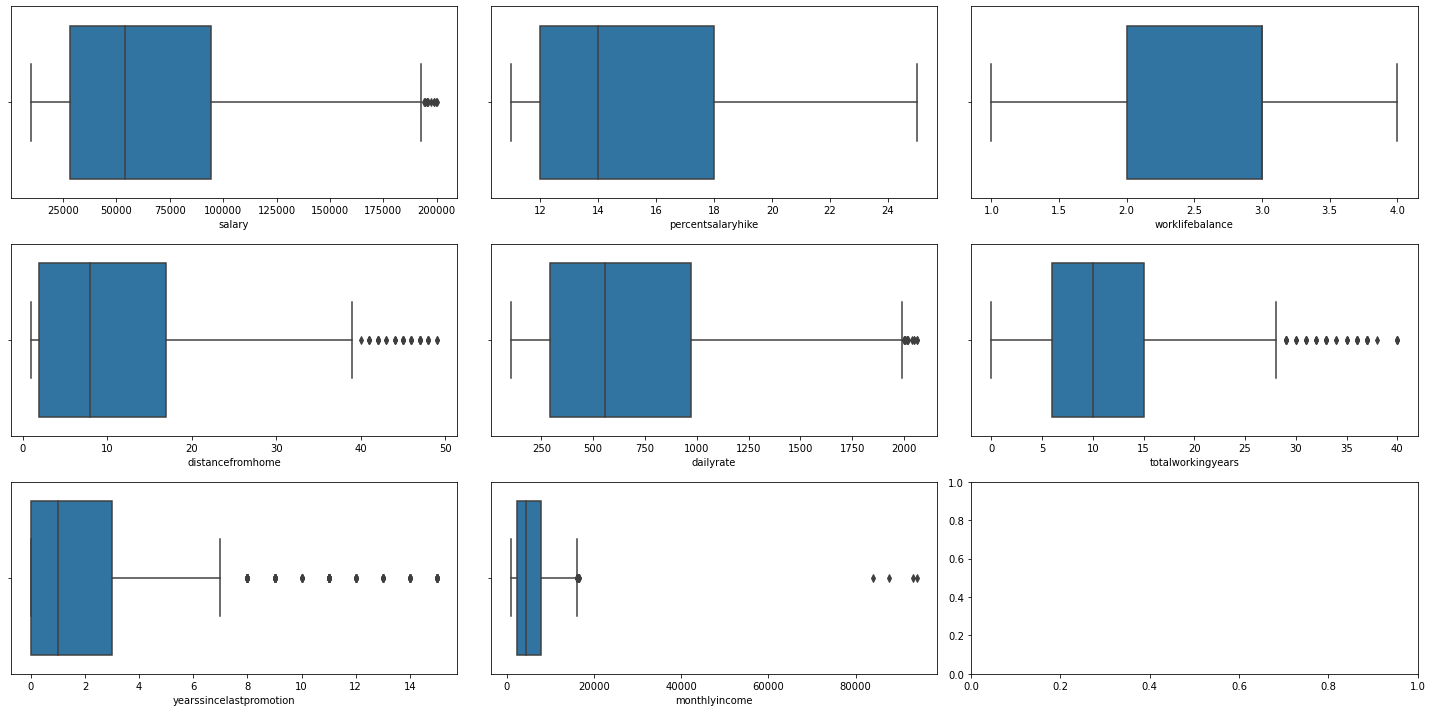

In [153]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20,10)) 
axes = axes.flat
for indice, col in enumerate(columnas2):
    sns.boxplot(x = col, data = df, ax = axes[indice])
    
plt.tight_layout();

In [154]:
mediana_salary = df["salary"].median()

In [155]:
df["salary"] = df["salary"].fillna(mediana_salary)

In [156]:
df["salary"].describe()[["mean", "50%"]]

mean    63175.984023
50%     53914.110000
Name: salary, dtype: float64

---

In [157]:
mediana_monthlyincome = df["monthlyincome"].median()

In [158]:
df["monthlyincome"] = df["monthlyincome"].fillna(mediana_monthlyincome)

In [159]:
df["monthlyincome"].describe()[["mean", "50%"]]

mean    5331.763159
50%     4492.840000
Name: monthlyincome, dtype: float64

---

In [160]:
mediana_worklifebalance = df["worklifebalance"].mean()

In [161]:
df["worklifebalance"] = df["worklifebalance"].fillna(mediana_worklifebalance)

In [162]:
df["worklifebalance"].describe()[["mean", "50%"]]

mean    2.759591
50%     3.000000
Name: worklifebalance, dtype: float64

---

# df-Satisfecho / df-No Satisfecho

In [163]:
df.head(2)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,remotework
0,52,No,non-travel,2015.7,desconocido,6,3,desconocido,1,1,1,M,252.0,3,5,research director,3,desconocido,16280.83,42330.17,7,No,13,3.0,3,full time,0,NaN,5,3.0,20,15,15,16280.83,1972,195370.0,desconocido,True
1,53,No,non-travel,2063.4,desconocido,1,4,life sciences,1,2,3,M,257.9,2,5,manager,3,desconocido,4492.84,43331.17,0,Desconocido,14,3.0,1,full time,1,34.0,5,3.0,33,11,9,NaN,1971,199990.0,desconocido,False


In [164]:
job_satisfecha = df[df['jobsatisfaction'].isin([3,4])]
job_no_satisfecha = df[df['jobsatisfaction'].isin([1,2])]

In [165]:
job_satisfecha.head(2)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,remotework
0,52,No,non-travel,2015.7,desconocido,6,3,desconocido,1,1,1,M,252.0,3,5,research director,3,desconocido,16280.83,42330.17,7,No,13,3.0,3,full time,0,NaN,5,3.0,20,15,15,16280.83,1972,195370.0,desconocido,True
1,53,No,non-travel,2063.4,desconocido,1,4,life sciences,1,2,3,M,257.9,2,5,manager,3,desconocido,4492.84,43331.17,0,Desconocido,14,3.0,1,full time,1,34.0,5,3.0,33,11,9,NaN,1971,199990.0,desconocido,False


In [166]:
job_no_satisfecha.head(2)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary,roledepartament,remotework
4,47,No,non-travel,1582.8,desconocido,3,3,technical degree,1,5,1,F,197.8,4,4,sales executive,1,divorced,12783.92,33238.20,2,No,12,3.0,4,full time,1,NaN,5,3.0,19,2,8,12783.92,1977,53914.11,desconocido,True
6,60,No,non-travel,1032.5,desconocido,25,3,life sciences,1,7,1,F,129.1,3,3,sales executive,1,desconocido,8339.32,21682.23,7,Desconocido,11,3.0,4,part time,0,28.0,3,2.0,21,7,9,8339.32,1964,100071.84,desconocido,True


In [167]:
df['jobsatisfaction'].unique()     #1-2 no satisfecho / 3-4 si satisfecho

array([3, 4, 1, 2])

In [168]:
job_satisfecha.shape

(1035, 38)

In [169]:
job_no_satisfecha.shape

(643, 38)

In [170]:
job_satisfecha.describe()

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,monthlyincome,monthlyrate,numcompaniesworked,percentsalaryhike,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,sameasmonthlyincome,datebirth,salary
count,1035.000000,1035.000000,1035.000000,1035.000000,1035.0,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,906.000000,1035.000000,1035.000000,695.000000,1035.000000,1035.000000,1035.000000,1035.000000,1035.000000,742.000000,1035.000000,1035.000000
mean,37.902415,660.982609,11.314976,2.929469,1.0,813.372947,2.704348,82.626280,2.737198,2.048309,3.519807,5299.061546,13880.559826,2.579710,15.171981,3.143488,2.683092,0.786473,11.169784,2.782609,2.747759,7.057005,2.171014,4.092754,5617.421267,1986.097585,63363.905971
std,9.154442,466.712204,10.656738,1.052698,0.0,467.091281,1.108927,58.330579,0.720331,1.087819,0.499849,5552.722576,9800.818290,2.447944,3.646809,0.350763,1.074612,0.841277,7.653517,1.320163,0.674380,6.056123,3.166363,3.446341,6531.909519,9.154442,42030.014775
min,19.000000,104.100000,1.000000,1.000000,1.0,1.000000,1.000000,13.000000,1.000000,1.000000,3.000000,1000.000000,2186.170000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1000.000000,1963.000000,10090.000000
25%,31.000000,290.000000,2.000000,2.000000,1.0,406.500000,2.000000,36.300000,2.000000,1.000000,3.000000,3067.500000,6090.750000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,0.000000,2.000000,2342.590000,1980.000000,29540.000000
50%,36.000000,556.300000,8.000000,3.000000,1.0,825.000000,3.000000,69.500000,3.000000,2.000000,4.000000,4492.840000,11681.390000,1.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,1.000000,3.000000,4492.840000,1988.000000,53914.110000
75%,44.000000,906.000000,18.000000,4.000000,1.0,1223.500000,4.000000,113.250000,3.000000,3.000000,4.000000,4492.840000,19026.585000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.500000,3.000000,7.000000,7028.540000,1993.000000,63470.000000
max,61.000000,2063.400000,49.000000,5.000000,1.0,1614.000000,4.000000,257.900000,4.000000,5.000000,4.000000,94083.000000,43331.170000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,17.000000,94083.000000,2005.000000,199990.000000


Hipotesis Attrition. Vamos a ver la relacion de si el empleado ha dejado o no la empresa y su relación con la satisfacción. Yes (ha dejado la empresa) No (No ha dejado la empresa)

Satisfechos (3-4) -- se han ido de la empresa (145) -- Se quedan (890)
No satisfechos (1-2) -- se han ido de la empresa (516) -- Se quedan (127)

Tasas de rotación (% de empleados que han dejado la empresa): 
    Total: 17.64%
    No satisfechos: 21.92%
    Satisfechos: 15.06%
Podemos observar que la tasa de rotación en empleados no satisfechos es significativamente mayor a la de los empleados satisfechos. por lo tanto es de vital importancia para la empresa encontrar las causas de insatisfacción laboral de sus empleados para así aumentar la retención de talento. 

In [171]:
df["attrition"].value_counts()

No     1406
Yes     272
Name: attrition, dtype: int64

In [172]:
#de los empleados que estan satisfechos (3-4) vemos cuales se han ido de la empresa 145 frente a los que se quedan 890
job_satisfecha["attrition"].value_counts()

No     890
Yes    145
Name: attrition, dtype: int64

In [173]:
#de los empleados que no estan satisfechos (1-2) vemos cuales se han ido de la empresa 516 frente a los que se quedan 127
job_no_satisfecha["attrition"].value_counts()

No     516
Yes    127
Name: attrition, dtype: int64

TASA ROTACION TOTAL

In [174]:
def calcular_tasa_rotacion(empleados_inicio, empleados_fin, empleados_salieron):
    # Calcular el promedio de empleados
    promedio_empleados = (empleados_inicio + empleados_fin) / 2
    
    # Calcular la tasa de rotación
    tasa_rotacion = (empleados_salieron / promedio_empleados) * 100
    
    return round(tasa_rotacion, 2)  # Redondeamos a 2 decimales

# Valores definidos
empleados_inicio = 1678  # Número de empleados al inicio del período
empleados_fin = 1406      # Número de empleados al final del período
empleados_salieron = 272 # Número de empleados que salieron durante el período

# Calcular y mostrar la tasa de rotación
tasa_rotacion = calcular_tasa_rotacion(empleados_inicio, empleados_fin, empleados_salieron)
print(f"La tasa de rotación es: {tasa_rotacion}%")

La tasa de rotación es: 17.64%


TASA ROTACION SATISFECHOS 

In [175]:
def calcular_tasa_rotacion(empleados_inicio, empleados_fin, empleados_salieron):
    # Calcular el promedio de empleados
    promedio_empleados = (empleados_inicio + empleados_fin) / 2
    
    # Calcular la tasa de rotación
    tasa_rotacion = (empleados_salieron / promedio_empleados) * 100
    
    return round(tasa_rotacion, 2)  # Redondeamos a 2 decimales

# Valores definidos
empleados_inicio = 1035  # Número de empleados al inicio del período
empleados_fin = 890      # Número de empleados al final del período
empleados_salieron = 145 # Número de empleados que salieron durante el período

# Calcular y mostrar la tasa de rotación
tasa_rotacion = calcular_tasa_rotacion(empleados_inicio, empleados_fin, empleados_salieron)
print(f"La tasa de rotación es: {tasa_rotacion}%")

La tasa de rotación es: 15.06%


TASA ROTACION INSATISFECHOS

In [176]:
def calcular_tasa_rotacion(empleados_inicio, empleados_fin, empleados_salieron):
    # Calcular el promedio de empleados
    promedio_empleados = (empleados_inicio + empleados_fin) / 2
    
    # Calcular la tasa de rotación
    tasa_rotacion = (empleados_salieron / promedio_empleados) * 100
    
    return round(tasa_rotacion, 2)  # Redondeamos a 2 decimales

# Valores definidos
empleados_inicio = 643  # Número de empleados al inicio del período
empleados_fin = 516      # Número de empleados al final del período
empleados_salieron = 127 # Número de empleados que salieron durante el período

# Calcular y mostrar la tasa de rotación
tasa_rotacion = calcular_tasa_rotacion(empleados_inicio, empleados_fin, empleados_salieron)
print(f"La tasa de rotación es: {tasa_rotacion}%")

La tasa de rotación es: 21.92%


COUNT TOTAL DE PERSONAS POR JOBROLE

In [177]:
df["jobrole"].value_counts()

sales executive              381
research scientist           325
laboratory technician        289
manufacturing director       168
healthcare representative    155
manager                      115
sales representative          96
research director             90
human resources               59
Name: jobrole, dtype: int64

% POR JOB ROLE DE SATISFACCIÓN

In [178]:
# Calcular el conteo de cada valor en la columna 'jobrole'
x = job_satisfecha["jobrole"].value_counts()

# Calcular el porcentaje con respecto al total de empleados (1035 en este caso)
porcentajes = (x / 1035) * 100

# Mostrar los porcentajes
print(porcentajes)



sales executive              23.381643
research scientist           20.096618
laboratory technician        16.811594
healthcare representative    10.241546
manufacturing director        9.468599
manager                       6.183575
sales representative          5.603865
research director             5.217391
human resources               2.995169
Name: jobrole, dtype: float64


In [179]:
# Calcular el conteo de cada valor en la columna 'jobrole'
x = job_no_satisfecha["jobrole"].value_counts()

# Calcular el porcentaje con respecto al total de empleados (1035 en este caso)
porcentajes = (x / 643) * 100

# Mostrar los porcentajes
print(porcentajes)

sales executive              21.617418
research scientist           18.195956
laboratory technician        17.884914
manufacturing director       10.886470
manager                       7.931571
healthcare representative     7.620529
sales representative          5.909798
research director             5.598756
human resources               4.354588
Name: jobrole, dtype: float64


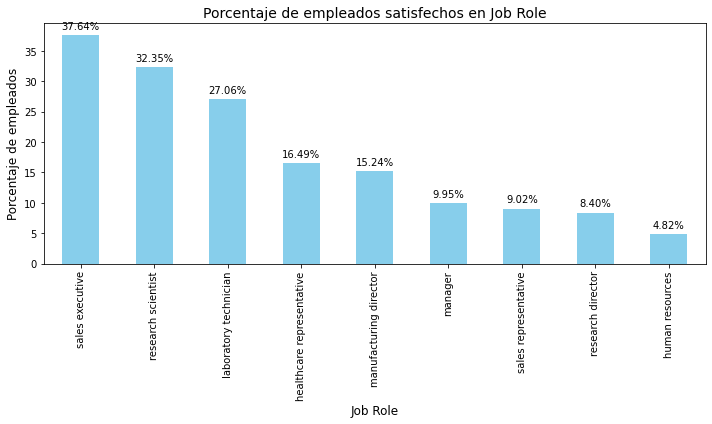

In [180]:
# Calcular el conteo de cada valor en la columna 'jobrole'
x = job_satisfecha["jobrole"].value_counts()

# Calcular el porcentaje con respecto al total de empleados (643 en este caso)
porcentajes = (x / 643) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10,6))
porcentajes.plot(kind='bar', color='skyblue')

# Añadir etiquetas y título
plt.title('Porcentaje de empleados satisfechos en Job Role', fontsize=14)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Porcentaje de empleados', fontsize=12)

# Mostrar los valores en las barras
for i in range(len(porcentajes)):
    plt.text(i, porcentajes[i] + 1, f'{porcentajes[i]:.2f}%', ha='center', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


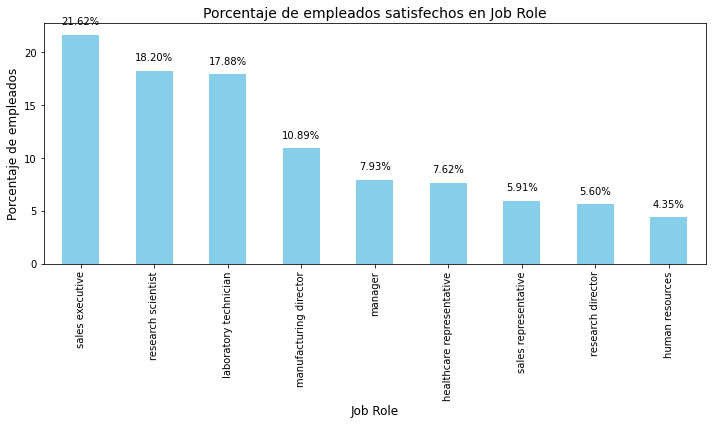

In [181]:
# Calcular el conteo de cada valor en la columna 'jobrole'
y = job_no_satisfecha["jobrole"].value_counts()

# Calcular el porcentaje con respecto al total de empleados (643 en este caso)
porcentajes = (y / 643) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10,6))
porcentajes.plot(kind='bar', color='skyblue')

# Añadir etiquetas y título
plt.title('Porcentaje de empleados satisfechos en Job Role', fontsize=14)
plt.xlabel('Job Role', fontsize=12)
plt.ylabel('Porcentaje de empleados', fontsize=12)

# Mostrar los valores en las barras
for i in range(len(porcentajes)):
    plt.text(i, porcentajes[i] + 1, f'{porcentajes[i]:.2f}%', ha='center', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [182]:
job_no_satisfecha["jobrole"].value_counts()

sales executive              139
research scientist           117
laboratory technician        115
manufacturing director        70
manager                       51
healthcare representative     49
sales representative          38
research director             36
human resources               28
Name: jobrole, dtype: int64

A/B TESTING - PARA RELACION ENTRE SATISFACCIÓN Y ABANDONAR LA EMPRESA
- H0: La satisfacción no interfiere en la salida de las personas de la empresa. No hay relacion entre attrition y satisfacción
- H1: La satisfacción si interfiere en la salida de las personas de la empresa. Hay relacion entre attrition y satisfacción

Vamos a realizar la prueba de chi-cuadrado ya que tenemos variables categoricas. Responder preguntas sobre la asociación o compatibilidad entre variables categóricas, y para determinar si las observaciones que hemos registrado son consistentes con lo que esperaríamos bajo una hipótesis nula (sin relación). 

In [193]:
cross_tab_satisf =  pd.crosstab(df['SatisfactionLevel'], df["attrition"])
print(cross_tab_satisf)

attrition           No  Yes
SatisfactionLevel          
No satisfecho      516  127
Satisfecho         890  145


In [194]:
# Test de Chi-cuadrado 
chi2, p, dof, expected = chi2_contingency(cross_tab_satisf)
print(f"Chi2: {chi2}, p-valor: {p}, Grados de libertad: {dof}")

Chi2: 9.207799360899815, p-valor: 0.0024098620607821367, Grados de libertad: 1


In [ ]:
# Interpretar resultado
if p < 0.05:
     print("Rechazamos la hipótesis nula: Hay una relación significativa entre satisfacción laboral y attrition.") 
else:
     print("No podemos rechazar la hipótesis nula: No hay relación significativa.")

Rechazamos la hipótesis nula: Hay una relación significativa entre género y atrición.


Calculo de lo que costaria el reemplazo de cada empleado. Por lo que vemos para la empresa que significa en terminos economicos que haya una alta rotación y posteriormente tengamos que sustituir a los empleados.

In [104]:
# Carga del DataFrame (suponiendo que ya tienes el archivo o los datos cargados)
# df = pd.read_csv("empleados.csv")  # Reemplazar con el archivo real o datos

# Filtrar empleados que dejaron la empresa
empleados_rotacion = df[df['attrition'] == "Yes"]

# Función para calcular el costo de rotación para cada empleado
def calcular_costo_empleado(row):
    # Costo de reclutamiento basado en el nivel del trabajo
    if row['joblevel'] <= 2:  # Niveles bajos
        costo_reclutamiento = 5000
    else:  # Niveles medios/altos
        costo_reclutamiento = 10000
    
    # Costo de formación basado en el número de capacitaciones
    costo_formacion = row['trainingtimeslastyear'] * 1000  # $1,000 por capacitación
    
    # Pérdida de productividad: 2 meses de salario mensual
    perdida_productividad = row['monthlyincome'] * 2
    
    # Costo total
    return costo_reclutamiento + costo_formacion + perdida_productividad

# Aplicar la función a los empleados con rotación
empleados_rotacion['Costo_Rotacion'] = empleados_rotacion.apply(calcular_costo_empleado, axis=1)

# Sumar el costo total de rotación
costo_total_rotacion = empleados_rotacion['Costo_Rotacion'].sum()

# Resultados
print(f"Costo total de rotación: ${costo_total_rotacion:,.2f}")

# Opcional: Ver costos por departamento
costo_por_departamento = empleados_rotacion.groupby('department')['Costo_Rotacion'].sum()
print("\nCosto total por departamento:")
print(costo_por_departamento)

Costo total de rotación: $4,949,210.96

Costo total por departamento:
department
desconocido               4110536.70
human resources             61035.68
research & development     463245.32
sales                      314393.26
Name: Costo_Rotacion, dtype: float64


In [ ]:
def calcular_rotacion_nivel(bajas_nivel, empleados_inicio, empleados_fin):
    promedio_empleados = (empleados_inicio + empleados_fin) / 2
    rotacion = (bajas_nivel / promedio_empleados) * 100
    return rotacion

# Ejemplo de uso:
rotacion_nivel = calcular_rotacion_nivel(bajas_nivel=3, empleados_inicio=20, empleados_fin=18)
print(f"Tasa de rotación por nivel jerárquico: {rotacion_nivel:.2f}%")

Hipotesis 1, la gente que  esta  satisfecha cobra mas que la gente insatisfecha.
Para contrastar esta hipotesis hemos hecho la media a ambas poblaciones y hemos descubierto que la gente no-satisfecha cobra más por lo que nuestra hipotesis es nula.
De esto podemos deducir que el monthly income a prioory no es tan determinante enla satisfacción.

In [27]:
job_satisfecha["monthlyincome"].mean()

5299.061545893662

In [28]:
job_no_satisfecha["monthlyincome"].mean()

5384.401057542744

Hipótesis 2. La gente satisfecha tiene mas incremento salarial percentual anual que la insatisfecha. Para ello hemos hecho la media de ambas. La hipótesis es nula. Esto vuelve a confirmar que la satisfacción no tiene una fuerte relación con el salario.

In [29]:
job_satisfecha["percentsalaryhike"].mean()

15.171980676328502

In [30]:
job_no_satisfecha["percentsalaryhike"].mean()

15.12597200622084

Hipotesis 3: La opción de compra de acciones es relevante para la satisfacción del empleado. Hemos descubierto haciendo las medias que no es así.

In [31]:
job_satisfecha["stockoptionlevel"].mean()

0.7864734299516908

In [32]:
job_no_satisfecha["stockoptionlevel"].mean()

0.7900466562986003

*Reflexión motivos económicos.*
Hemos contrastado tres hipótesis respecto a datos económicos de los empleados respecto a la satisfacción.
Las tres variables contrastadas han sido ingresos mensuales, incremento salarial anual y opción de compra de acciones. En las tres ha sucedido que hemos contrastado que no tiene relación con la satisfacción laboral, por lo que descartamos avanzar en esta linea de investigación.

In [33]:
job_satisfecha["distancefromhome"].mean()

11.314975845410627

In [34]:
job_no_satisfecha["distancefromhome"].mean()

10.975116640746501

------

Test hipotesis(prueba hipotesis)
H0 --> No hay diferencia en satisfaccion del empleado por los viajes que hace.
H1 --> La gente satisfecha viaja mas.

In [35]:
job_satisfecha["businesstravel"].value_counts()

non-travel           541
travel_rarely        383
travel_frequently    111
Name: businesstravel, dtype: int64

In [36]:
job_no_satisfecha["businesstravel"].value_counts()

non-travel           353
travel_rarely        233
travel_frequently     57
Name: businesstravel, dtype: int64

-----

In [37]:
job_satisfecha = df[df['jobsatisfaction'].isin([3,4])]["businesstravel"]
job_no_satisfecha = df[df['jobsatisfaction'].isin([1,2])]["businesstravel"]



In [196]:
cross_table_satisfaccion =  pd.crosstab(df['SatisfactionLevel'], df["businesstravel"])
print(cross_table_satisfaccion)

businesstravel     non-travel  travel_frequently  travel_rarely
SatisfactionLevel                                              
No satisfecho             353                 57            233
Satisfecho                541                111            383


In [197]:
# Test de Chi-cuadrado 
chi2, p, dof, expected = chi2_contingency(cross_table_satisfaccion)
print(f"Chi2: {chi2}, p-valor: {p}, Grados de libertad: {dof}")

Chi2: 1.9484420300621912, p-valor: 0.3774862952101665, Grados de libertad: 2


In [ ]:
# Interpretar resultado
if p < 0.05:
     print("Rechazamos la hipótesis nula: Hay una relación significativa entre Satisfacción laboral  y tener que hacer viajes.") 
else:
     print("No podemos rechazar la hipótesis nula: No hay relación significativa.")

No podemos rechazar la hipótesis nula: No hay relación significativa.



En este test de hipótesis no podemos rechazar el H0. por esto la satisfacción laboral es independiente de los viajes que hace el empleado.
Conclusión : Añadir una columna para hacer cuestionario a empleados para preguntar si les gusta o no viajar.(en una escala del 1-4)

In [199]:
cross_table_satisfaccion1 =  pd.crosstab(df['SatisfactionLevel'], df["remotework"])
print(cross_table_satisfaccion1)

remotework         False  True
SatisfactionLevel             
No satisfecho        266   377
Satisfecho           427   608


H₀: "La satisfacción laboral  es independiente del teletrabajo."
H₁: "La satisfacción laboral depende del teletrabajo."

In [200]:
# Test de Chi-cuadrado 
chi2, p, dof, expected = chi2_contingency(cross_table_satisfaccion1)
print(f"Chi2: {chi2}, p-valor: {p}, Grados de libertad: {dof}")

Chi2: 0.0, p-valor: 1.0, Grados de libertad: 1


In [202]:
# Interpretar resultado
if p < 0.05:
     print("Rechazamos la hipótesis nula: Hay una relación significativa.") 
else:
     print("No podemos rechazar la hipótesis nula: No hay relación significativa entre satisfacción labora y teletrabajo.")

No podemos rechazar la hipótesis nula: No hay relación significativa entre satisfacción labora y teletrabajo.


H₀: "La satisfacción laboral es independiente de la distancia al trabajo."
H₁: "La satisfacción laboral depende de la distancia al trabajo."

In [58]:
df["distancefromhome"].dtype

dtype('int64')

In [64]:
columnas3 = ["distancefromhome"]

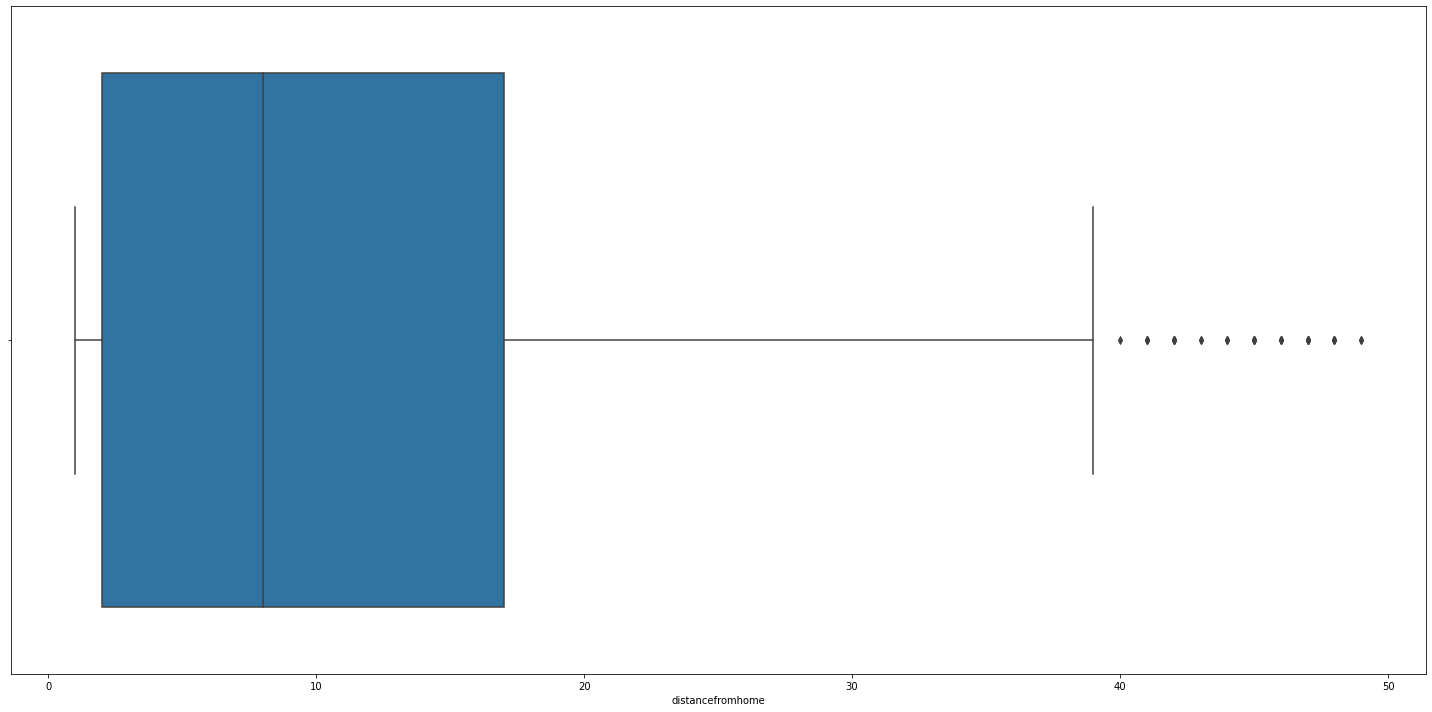

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 10)) 

# Si solo hay un gráfico, no hace falta usar axes.flat
sns.boxplot(x = columnas3[0], data = df, ax = axes)

plt.tight_layout()


In [76]:
medianadistancefromhome = df["distancefromhome"].median()

In [77]:
medianadistancefromhome

8.0

In [75]:
df["distancefromhome"] = df["distancefromhome"].fillna(medianadistancefromhome)

In [78]:
df["distancefromhome"].describe()[["mean", "50%"]]

mean    11.184744
50%      8.000000
Name: distancefromhome, dtype: float64

In [85]:
mediana_distancefromhome_sat = job_satisfecha["distancefromhome"].mean()

In [86]:
mediana_distancefromhome_sat

11.314975845410627

In [87]:
mediana_distancefromhome_no_sat = job_no_satisfecha["distancefromhome"].mean()

In [88]:
mediana_distancefromhome_no_sat

10.975116640746501

Reflexión categóricas movilidad

-----

***RESUMEN GUIA***
FASE 1 . Lista
FASE 2.  Lista 
FASE 3. BBDD. Lo hemos saltado por el momento. next steps. 
FASE 4. 
    Grupo A. Satisfecho(3-4). Grupo B. Insatisfecho(1-2).
    Rotación. Listo
    1. A más rotación. En esta columna, "No" indica que el empleado no ha dejado la empresa (sin rotación), mientras que "Yes" indica que el empleado ha dejado la empresa (con rotación).
    Teorias economicas. Listo
    1. A más *salario mensual* más satisfacción. No relevante para la satisfacción. 
    2. A más *subida porcentual anual* mas satisfacción. No relevante para la satisfacción.  
    3. Opción de *compra de acciones*. No relevante para la satisfacción. 
    Teorias movilidad. 
    1. A más *viajes* menos satisfacción. No es relevante.
    2. Cuando tienes *teletrabajo* estas mas satisfecho. No es relevante.
    3. *distancefromhome* no tiene relacion con la insatisfacción. Pensamos que esta no-relación puede venir de que la mayoria de empleados vive cerca de la oficina.
    

Grupo A; df_satisfecha (Control): Empleados con un nivel de satisfacción en el trabajo igual o superior a 3 en una escala de 1 a 5.

In [203]:
cross_table_satisfaccion2 =  pd.crosstab(df['SatisfactionLevel'], df["educationfield"])
print(cross_table_satisfaccion2)

educationfield     desconocido  human resources  life sciences  marketing  \
SatisfactionLevel                                                           
No satisfecho              283                9            140         46   
Satisfecho                 491                3            227         60   

educationfield     medical  other  technical degree  
SatisfactionLevel                                    
No satisfecho          113     23                29  
Satisfecho             173     40                41  


In [204]:
# Test de Chi-cuadrado 
chi2, p, dof, expected = chi2_contingency(cross_table_satisfaccion2)
print(f"Chi2: {chi2}, p-valor: {p}, Grados de libertad: {dof}")

Chi2: 9.546860616333914, p-valor: 0.1450777993160223, Grados de libertad: 6


In [205]:
# Interpretar resultado
if p < 0.05:
     print("Rechazamos la hipótesis nula: Hay una relación significativa.") 
else:
     print("No podemos rechazar la hipótesis nula: No hay relación significativa.")

No podemos rechazar la hipótesis nula: No hay relación significativa.


In [47]:
df["educationfield"].unique()

array(['desconocido', 'life sciences', 'technical degree', 'medical',
       'other', 'marketing', 'human resources'], dtype=object)

([<matplotlib.axis.YTick at 0x7f50365806d0>,
 [Text(0, 0, 'desconocido'),
  Text(0, 1, 'life sciences'),
  Text(0, 2, 'technical degree'),
  Text(0, 3, 'medical'),
  Text(0, 4, 'other'),
  Text(0, 5, 'marketing'),
  Text(0, 6, 'human resources')])

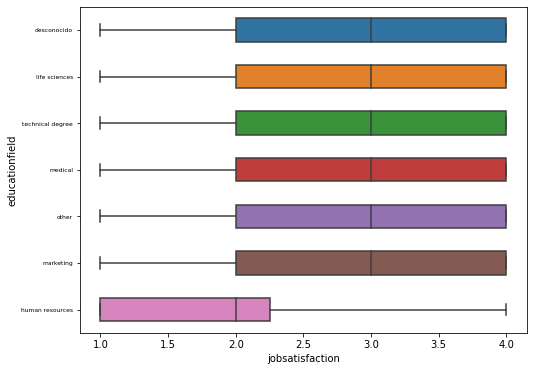

In [207]:
# Crear el boxplot
plt.figure(figsize=(8, 6)) 
sns.boxplot(data = df, width=0.5, y = "educationfield", x = "jobsatisfaction")
 # Ajustar la posición de los ticks en el eje X
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6, ], labels=['desconocido', 'life sciences', 'technical degree', 'medical',
       'other', 'marketing', 'human resources'], fontsize=6)

In [208]:
def intervalo_confianza(dataframe, columna, nivel_confianza = float):
    """
    Calcula el intervalo de confianza para una columna específica en un DataFrame.
    Parámetros:
    -----------
    dataframe : DataFrame
        El DataFrame que contiene los datos de la muestra.
    columna : str
        El nombre de la columna para la cual deseas calcular el intervalo de confianza.
    nivel_confianza : float, opcional
        El nivel de confianza deseado para el intervalo de confianza (valor predeterminado es 0.95).
    Salida:
    -------
    None
        La función imprime en la consola la siguiente información:
        - La media muestral de la columna especificada.
        - El error estándar de la muestra.
        - El nivel de confianza utilizado.
        - El valor crítico calculado a partir de la distribución t de Student.
        - El intervalo de confianza calculado, que incluye el límite inferior y el límite superior.
    """
    # Calcular la media y el error estándar de la muestra
    media = dataframe[columna].mean()
    error = stats.sem(dataframe[columna])
    # calculamos los grados de libertad de la muestra. Recordad que debemos restar el total de datos que tenemos -1.
    grados_libertad = len(df[columna]) - 1
    # Calcular el valor crítico (utilizando la distribución t de Student)
    valor_critico = stats.t.ppf((1 + nivel_confianza) / 2, df=grados_libertad)
    # Calcular el intervalo de confianza
    limite_inferior = media - valor_critico * error
    limite_superior = media + valor_critico * error
    print(f"Intervalo de Confianza para {columna}:")
    print(f"Media Muestral: {np.round(media, 2)}")
    print(f"Error Estándar: {np.round(error, 2)}")
    print(f"Nivel de Confianza: {nivel_confianza}")
    print(f"Valor Crítico: {np.round(valor_critico, 2)}")
    print(f"Intervalo de Confianza: ({np.round(limite_inferior, 2)}, {np.round(limite_superior, 2)})")
